<a href="https://colab.research.google.com/github/Veeraprathap3740/Bharat_Intern/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT NECESSARY LIBRARIES


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
tsd = pd.read_csv(r"/Titanic-Dataset.csv")

In [ ]:
tsd.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
tsd.shape

(891, 12)

In [ ]:
tsd.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
tsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
tsd.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
tsd.drop(['Cabin'], axis='columns', inplace=True)

In [ ]:
tsd.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
tsd.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [ ]:
tsd.Age = tsd.Age.fillna(tsd.Age.mean())

In [ ]:
tsd.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
tsd.fillna(method='ffill', inplace=True)

In [ ]:
tsd.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

ANALYSING THE DATA

In [ ]:
tsd.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# how many survived
tsd['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
# Visualising the data
sns.set()

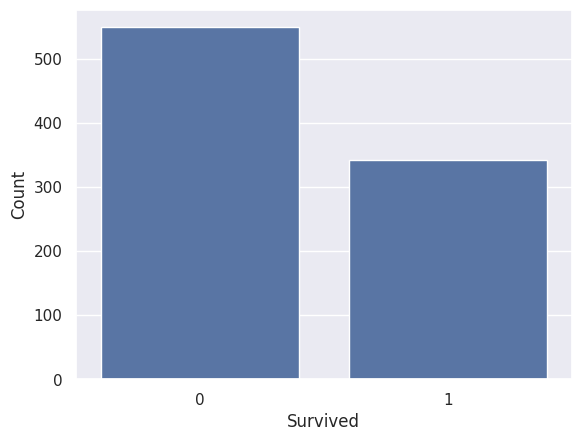

In [ ]:
sns.countplot(x=tsd['Survived'])
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [ ]:
tsd['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

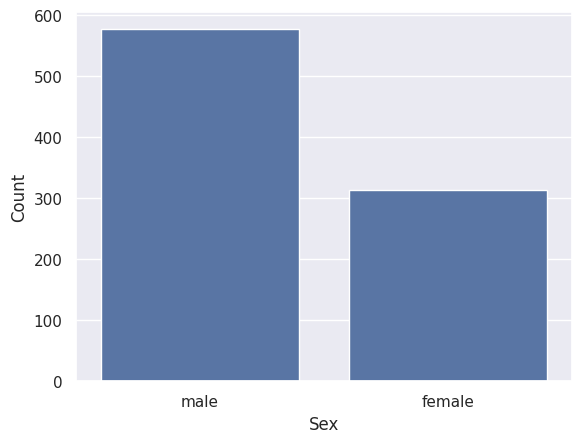

In [ ]:
sns.countplot(x=tsd['Sex'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

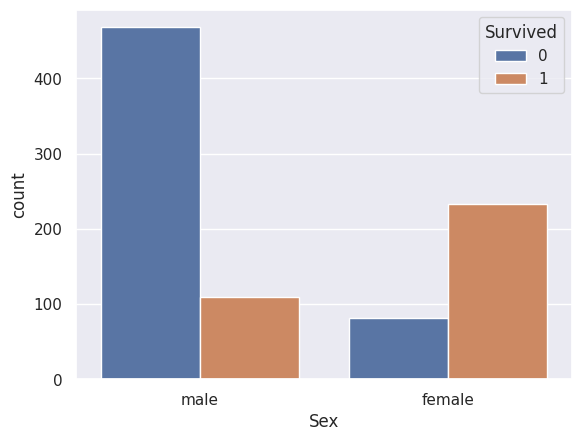

In [ ]:
# Analysing the Gender wise survival
sns.countplot(x='Sex', hue='Survived', data=tsd)

<Axes: xlabel='Pclass', ylabel='count'>

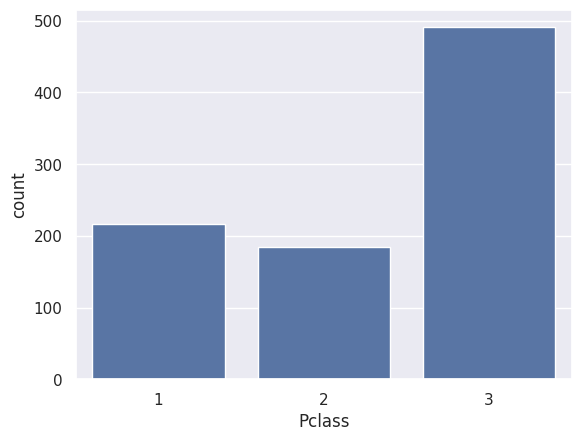

In [ ]:
# countplot for "Pclass" column
sns.countplot(x='Pclass', data=tsd)

<Axes: xlabel='Pclass', ylabel='count'>

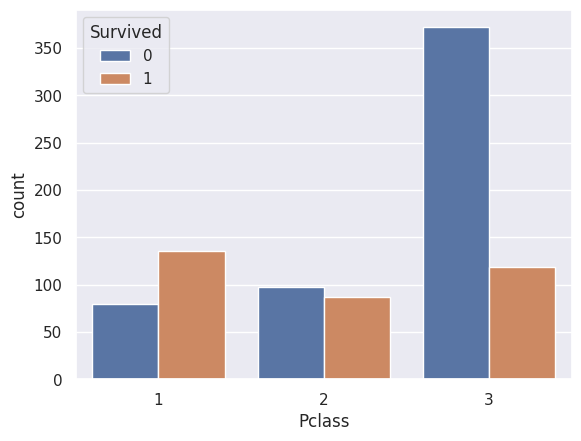

In [ ]:
sns.countplot(x='Pclass',hue='Survived',data=tsd)

ENCODING THE CATEGORICAL COLUMNS/DATA

In [ ]:
tsd['Sex'].value_counts()


male      577
female    314
Name: Sex, dtype: int64

In [ ]:
tsd['Embarked'].value_counts()

S    644
C    169
Q     78
Name: Embarked, dtype: int64

In [ ]:
# tsd['Sex']=tsd['Sex'].astype('category')
# tsd['Sex']=tsd['Sex'].cat.codes

# tsd['Embarked']=tsd['Embarked'].astype('category')
# tsd['Embarked']=tsd['Embarked'].cat.codes

tsd.replace({'Sex':{"male": 0, 'female':1}, 'Embarked':{'S':0, "C":1, "Q":2}})

In [ ]:
tsd.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [ ]:
tsd.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
x=tsd.drop(columns=['PassengerId','Survived','Name','Ticket'], axis=1)
y=tsd['Survived']

SPLIT THE DATA INTO TEST DATA & TRAIN DATA

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
30,1,1,40.000000,0,0,27.7208,0
10,3,0,4.000000,1,1,16.7000,2
873,3,1,47.000000,0,0,9.0000,2
182,3,1,9.000000,4,2,31.3875,2
876,3,1,20.000000,0,0,9.8458,2
...,...,...,...,...,...,...,...
534,3,0,30.000000,0,0,8.6625,2
584,3,1,29.699118,0,0,8.7125,0
493,1,1,71.000000,0,0,49.5042,0
527,1,1,29.699118,0,0,221.7792,2


In [ ]:
y_train

30     0
10     1
873    0
182    0
876    0
      ..
534    0
584    0
493    0
527    0
168    0
Name: Survived, Length: 712, dtype: int64

In [ ]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
707,1,1,42.000000,0,0,26.2875,2
37,3,1,21.000000,0,0,8.0500,2
615,2,0,24.000000,1,2,65.0000,2
169,3,1,28.000000,0,0,56.4958,2
68,3,0,17.000000,4,2,7.9250,2
...,...,...,...,...,...,...,...
89,3,1,24.000000,0,0,8.0500,2
80,3,1,22.000000,0,0,9.0000,2
846,3,1,29.699118,8,2,69.5500,2
870,3,1,26.000000,0,0,7.8958,2


In [ ]:
y_test

707    1
37     0
615    1
169    0
68     1
      ..
89     0
80     0
846    0
870    0
251    0
Name: Survived, Length: 179, dtype: int64

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(891, 7) (712, 7) (179, 7)


LOGISTICAL REGRESSION & MODEL TRAINING

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
x_train_prediction=model.predict(x_train)

In [ ]:
x_train_prediction

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

EVALUATING & TESTING THE MODEL

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
model.score(x_train, y_train)

0.8132022471910112

In [ ]:
model.score(x_test, y_test)

0.7877094972067039

In [ ]:
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [ ]:
!pip install pyngrok

import subprocess
import os
from pyngrok import ngrok
#setup ngrok with authtoken

ngrok.set_auth_token('2ckusLYsylmCiGBAr8ht7Ki8yOg_85KFXd2bgFV8HPuwbKdJn')

# running flask app
os.system('nohup python -m flask run --no-reload &')

# opening ngrok tunnel to the flask app uding http protocol
proc = subprocess.Popen(["ngrok", "http", "5000"])

# Retrive ngrok's  public url here
public_url = ngrok.connect(addr="5000", proto="http")
print("Public URl:", public_url)

Public URl: NgrokTunnel: "https://c86a-34-148-26-134.ngrok-free.app" -> "http://localhost:5000"


In [ ]:
from flask import Flask, request, jsonify
import joblib
from pyngrok import ngrok
from IPython.display import display, HTML

# Load the trained model
model=joblib.load('logistic_regression_model.pkl')

app=Flask(__name__)

@app.route('/')
def home():
  # HTML form to take inputs
  html_form = """
  <!DOCTYPE html>
  <html lang="en">
  <head>
       <meta charset="UTF-8">
       meta name="viewport" content="width=device-width, initial-scale=1.0">
       < <title>Titanic Survival Prediction</title>
  </head>
  <body>
      <h2>Titanic Survival Prediction</h2>
      <form id="predictionForm" method="post" action="/predict">
           <label for="pclass">Pclass:</label>
           <input type="text" id="pclass" name="pclass"><br><br>

           <label for="sex">Sex (0 for male, 1 for female):</label>
           <input type="text" id="sex" name="sex"><br><br>

           <label for="age">Age:</label>
           <input type="text" id="age" name="age"><br><br>

           <label for="sibsp">Sibsp;</label>
           <input type="text" id="sibsp" name="sibsp"><br><br>

           <label for="parch">Parch:</label>
           <input type="text" id="parch" name="parch"><br><br>

           <label for="fare">Fare:</label>
           <input type="text" id="fare" name="face"><hr><hr>

           <label for="embarked">Embarked (0 for S, 1 for C, 2 for Q): </label>
           <input type="text" id="embarked" name="embarked"><br><br>

           <button type="button" onclick="predictsurvival()">Predict</button>
        </form>

        <p id="predictionResult"></p>
        <script>
            function predictSurvival() {
              var xhr = new XMLHttpRequest();
              var url = "/predict";
              var data = new FormData(document.getElementById("predictionForm")); // Changed to FormData

              xhr.open("POST", url, true);
              xhr.onreadystatechange = function () {
                if (xhr.readyState == 4 && xhr.status === 200) {
                  var response = JSON.parse(xhr.responseText);
                  document.getElementById("predictionResult").innerHTML = "Survival Prediction:" + response.prediction;
                }
              };
              xhr.send(data);
            }
        </script>
  </body>
  </html>"""
  return html_form

@app.route('/predict', methods=['POST'])

def predict():
  #Access form data
  pclass = request.form['pclass']
  sex = request.form['sex']
  age=request.form['age']
  sibsp=request.form['sibsp']
  parch=request.form['parch']
  fare=request.form['fare']
  embarked = request.form['embarked']

  # Convert data to appropriate types
  pclass=int(pclass)
  sex=int(sex)
  age = float(age)
  sibsp=int(sibsp)
  parch=int(parch)
  fare=float(fare)
  embarked=int(embarked)

  #Make prediction
  features = [[pclass, sex, age, sibsp, parch, fare, embarked]]
  prediction=model.predict(features)[0]

  return jsonify({'prediction': int(prediction)})

def run_flask_app():
  #Run Flask app on port 5000
  app.run(host='127.0.0.1', port=5000, debug=True, use_reloader=False)

# Start ngrok tunnel
public_url = ngrok.connect(addr="5000", proto="http")
print("Public URL:", public_url)

#Display ngrok tunnel URL
display (HTML (f"<h2>Open this link in your browser to access the application:</h2><p>{public_url}</p>"))

try:
  #Keep the Flask app running
  run_flask_app()

except KeyboardInterrupt:
  #Shutdown ngrok and Flask app
  ngrok.kill()

Public URL: NgrokTunnel: "https://32bc-34-148-26-134.ngrok-free.app" -> "http://localhost:5000"


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [23/Feb/2024 10:49:03] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Feb/2024 10:49:04] "GET /favicon.ico HTTP/1.1" 404 -
